In [1]:
library('tidyverse')
library('rvest') # This lets us scrape data from a webpage
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [4]:
df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | ? |
| color | ? |
| facet value | ? |

In [5]:
x- year -> value is the year
y - race.time
color = Country
face-value = MF

ERROR: Error in parse(text = x, srcfile = src): <text>:1:18: unexpected symbol
1: x- year -> value is
                     ^


Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

In [18]:
library("ggrepel")

In [87]:
#We talked about manually creating a table

label_table = data.frame(
    country.simple = c('United States', 
                       'United States', 
                       'Kenya', 
                       'Kenya',
                       'Ethiopia',
                       'Japan'),
    MF = c("Men's", "Women's", "Men's", "Women's", "Women's", "Men's"),
    year = c(1915, 1975, 1990, 2010, 1995, 1955),
    race.time = c(2.75, 3, 2, 2.25, 2.75, 2.25)
)

label_table

country.simple,MF,year,race.time
<chr>,<chr>,<dbl>,<dbl>
United States,Men's,1915,2.75
United States,Women's,1975,3.00
Kenya,Men's,1990,2.00
Kenya,Women's,2010,2.25
Ethiopia,Women's,1995,2.75
Japan,Men's,1955,2.25


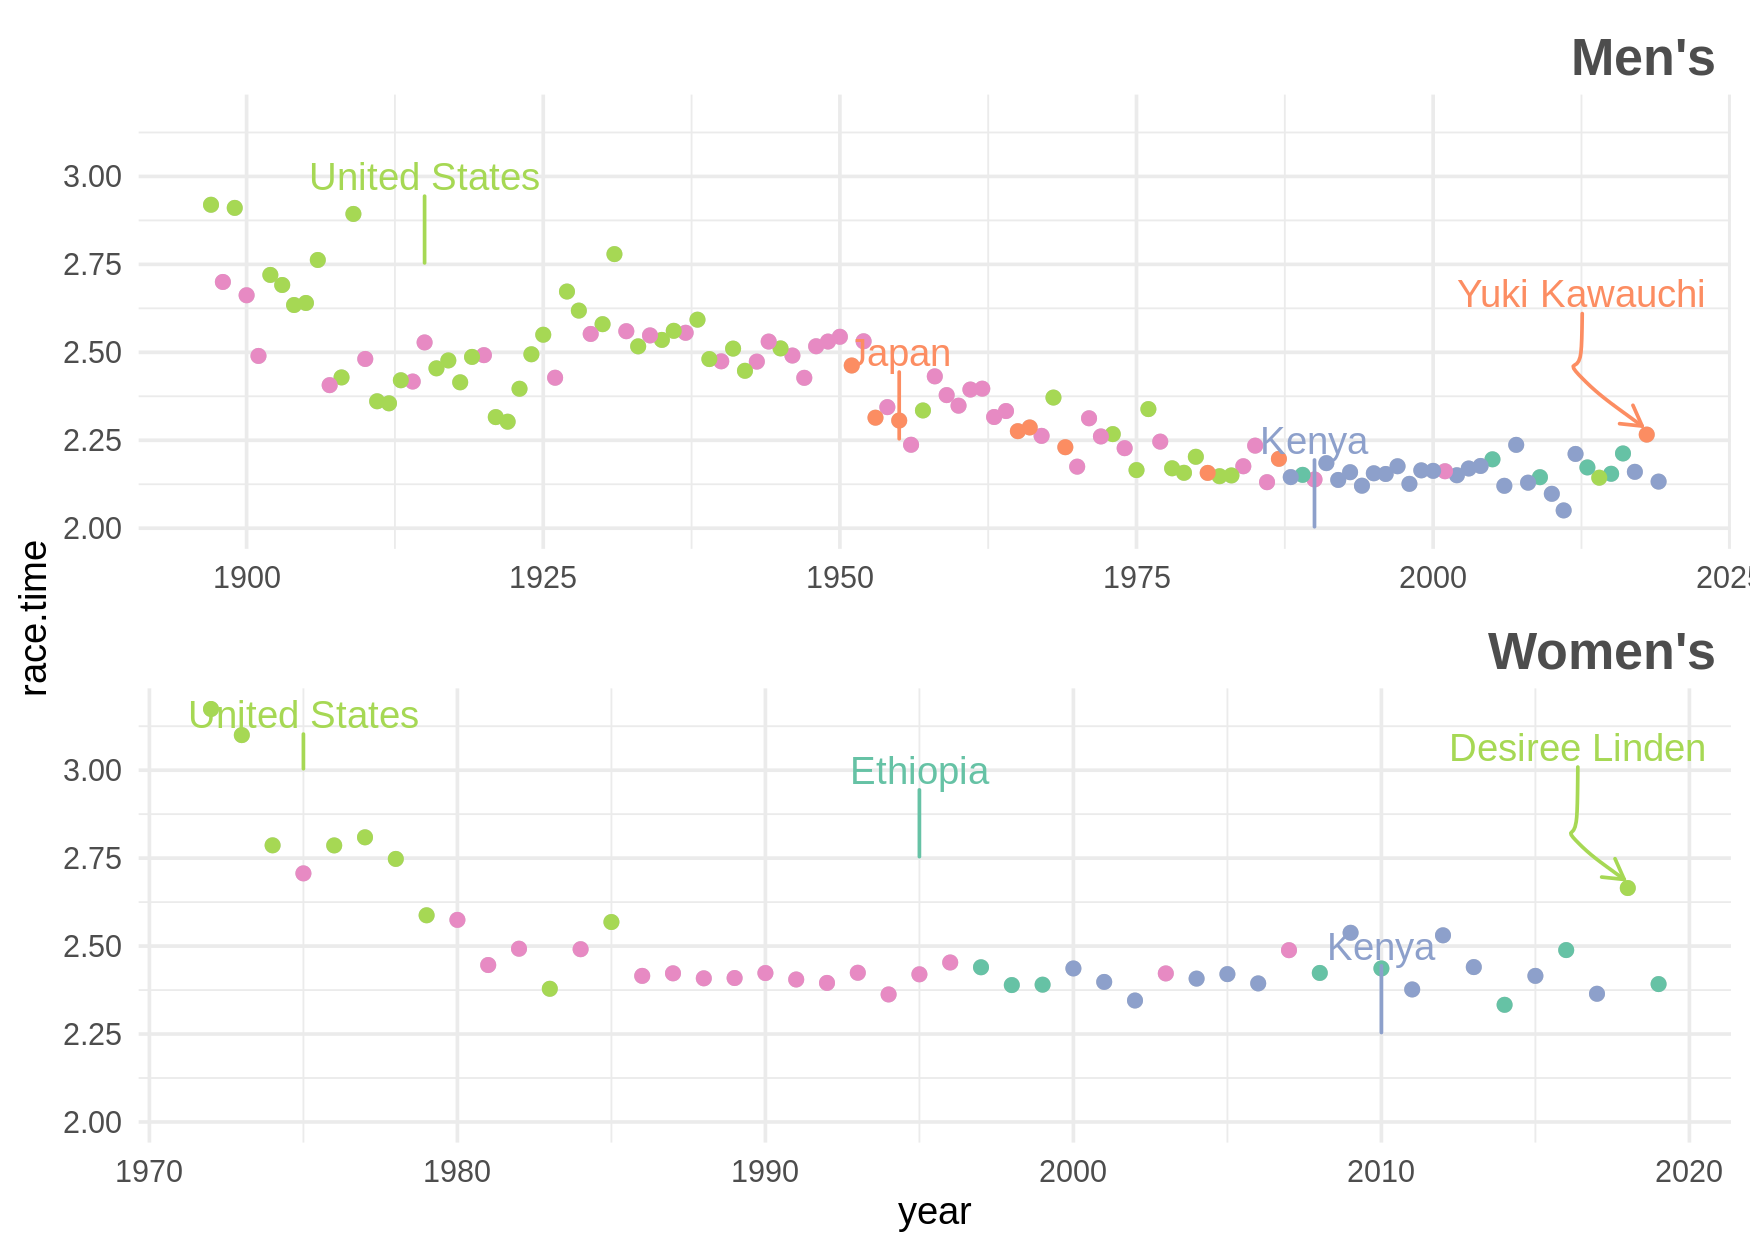

In [90]:
# I am coming back to this 9/30/2021 to follow what he did

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.res = 250)

p = ggplot(df.marathon, aes(x = year, y = race.time, color = country.simple, label = name))
    
#label = ifelse(year %in% (df.marathon  %>% filter(year == 2018)), name, "")))
           
p = p + facet_wrap(~MF, ncol = 1, scales = 'free_x') # I had forgotten that you put scales here


p = p + geom_point(color = 'grey80', data = df.marathon %>% select(-country), na.rm = T)

p = p + geom_point( na.rm = T) ## this means that NA's become true

p = p + scale_color_brewer(palette = 'Set2')

p = p + theme_minimal()

p = p + geom_text_repel(data = df.marathon %>% filter(year == 2018), nudge_x = .15,
                        box.padding = 0.5,
                        nudge_y = .4,
                        segment.curvature = 0.9,
                        segment.ncp = 2,
                        segment.angle = 15,
                        segment.size = 0.5,
                        arrow = arrow(length = unit(0.05, "npc")),
                        point.padding = 1)

p = p + geom_text_repel(data = label_table,
                       mapping = aes(label = country.simple),
                       nudge_y = 0.25)


 # Remember one equal sign is an assignment 
                                                               # two equal signs is a comparison

# for color brewer - he goes to a site called color brewer and finds the name of the set that he wants to use
# Ex. He uses the code scale_color_brewer(palette = 'Pastel1') This comes from that website.



p = p + theme(legend.position = 'none', # To remove the legend
              strip.text = element_text(hjust = 1, color = 'grey30', face = 'bold', size = 15))


p

# There is still a lot of work to be done on this table, especially with the labesl

# p = p + theme_minimal()

# p = p + labs(x = 'Body mass in grams', y = 'Body length in mm', color = 'Species_Test')

# ## Labs changes the titles for the scales

# ## Adding color = to the end of labs changes the legend title (the box to the side of the graph)
# p = p + theme(
#     axis.title.y = element_text(margin = margin(l = 0, r = 10, t = 0, b = 0)), ##These two lines add some spacing for the axis.title
#     axis.title.x = element_text(margin = margin(l = 0, r = 0, t = 10, b = 0)), ##l - left, r - right, t - top, b - bottom
#     strip.text = element_text(hjust = 0.05, color = 'grey30', face = 'bold'), ##hjust adjusts where the titles are located
#     ## 0 shifts it all the way to the left - for the grey's the higher the number the darker the grey

# ##The strip.text adjusts the title above the chart this is useful for the homework
#     legend.position = 'none' ##This removes the legend
# )

In [93]:
# we had a whole conversation about how making the secondary table is very time consuming anothe rway to do this would be to 
# the mean of each of these values to use for plotting

df.marathon %>% 
    group_by(MF, country.simple) %>%
    summarize(rt_mean = mean(race.time), year_mean = mean(year))


`summarise()` has grouped output by 'MF'. You can override using the `.groups` argument.



MF,country.simple,rt_mean,year_mean
<chr>,<chr>,<dbl>,<dbl>
Men's,Ethiopia,2.172083,2007.833
Men's,Japan,2.277315,1971.667
Men's,Kenya,2.151086,2001.909
Men's,other,2.401118,1948.952
Men's,United States,2.474678,1935.091
Women's,Ethiopia,2.411597,2007.625
Women's,Kenya,2.422199,2007.917
Women's,other,2.453333,1989.611
Women's,United States,2.760250,1981.500


What else might you visualize with this data? (e.g. What about totaling the winners from each country?)